## Working with categorical data

https://app.datacamp.com/learn/courses/working-with-categorical-data-in-python




In [1]:
import pandas as pd
import numpy as np

df_adults = pd.read_csv('./data/adult.csv')
df_adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [2]:
df_adults["Marital Status"].describe()  # 7 levels/cat's

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: Marital Status, dtype: object

In [3]:
df_adults["Marital Status"].value_counts()  # raw counts per level

Marital Status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [4]:
df_adults["Marital Status"].value_counts(normalize=True)  # relative frequencies

Marital Status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: proportion, dtype: float64

In [5]:
# Explore the Above/Below 50k variable
print(df_adults["Above/Below 50k"].describe(), "\n")

# Print a frequency table of "Above/Below 50k"
print(df_adults["Above/Below 50k"].value_counts(), "\n")

# Print relative frequency values
print(df_adults["Above/Below 50k"].value_counts(normalize=True))

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object 

Above/Below 50k
<=50K    24720
>50K      7841
Name: count, dtype: int64 

Above/Below 50k
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [6]:
df_adults.dtypes

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object

In [7]:
print(df_adults["Marital Status"].dtype)  # NOTE sigular dtype because working with a series (not a dataframe), 'O' = object
print(df_adults["Marital Status"].nbytes)  #

object
260488


In [8]:
# convert to categorical type
df_adults["Marital Status"] = df_adults["Marital Status"].astype("category")
print(df_adults["Marital Status"].dtype)  # displayes the levels
                                          # "ordered=False" because no order has been specified
print(df_adults["Marital Status"].nbytes)  # big memory savings! 260488 >> 32617

category
32617


## Creating a Categorical Series

+ series that do **NOT** have a logical order
+ series that **DO** have a logical order

## Why use Categorical dtype?

+ big memory saver - compare previous 2 cells above

## Best practice of setting dtypes

If you know the `dtype` of the columns you are reading in advance, it is best practice to specify them in the read.

In [9]:
my_data = ["A", "A", "C", "B", "C", "A"]
# if series does not have a logical order
my_series1 = pd.Series(my_data, dtype="category")
print(my_series1)

0    A
1    A
2    C
3    B
4    C
5    A
dtype: category
Categories (3, object): ['A', 'B', 'C']


In [10]:
# if series does have a logical order (ordinal)
my_series2 = pd.Categorical(my_data, categories=["C", "B", "A"], ordered=True)  # lowest to highest: 'C' < 'B' < 'A'
print(my_series2)

['A', 'A', 'C', 'B', 'C', 'A']
Categories (3, object): ['C' < 'B' < 'A']


In [11]:
# specify dtype if you know in advance
adult_types = {"Marital Status" : "category"}
df_adult = pd.read_csv("./data/adult.csv", dtype=adult_types)
print(df_adult["Marital Status"].dtype)

category


## Grouping data by category

<code>
adult = pd.read_csv("data/adult.csv")

adult1 = adult[adult["Above/Below 50k"] == " <=50K"] 
adult2 = adult[adult["Above/Below 50k"] == " >50K"]
</code>

The last two lines can replace by a one-liner using `group_by`

In [12]:
groupby_object = df_adult.groupby(by=["Above/Below 50k"])

groupby_object.mean(numeric_only=True)  # remember to specify numeric_only parameter (course code is incorrect for newer versions of pandas)

,Age,fnlgwt,Education Num,Capital Gain,Capital Loss,Hours/Week
Above/Below 50k,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [13]:
df_adult.groupby(by=["Above/Below 50k"])[['Age', 'Education Num']].count()

,Age,Education Num
Above/Below 50k,,
<=50K,24720,24720
>50K,7841,7841


In [14]:
# option 1: specify column, especially on large datasets (course code is incorrect for newer versions of pandas)
df_adult.groupby(by=["Above/Below 50k"])[['Age', 'Education Num']].sum()

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


In [15]:
# option 2: course code leaves out "numeric_only=True"
df_adult.groupby(by=["Above/Below 50k"]).sum(numeric_only=True)[['Age', 'Education Num']] 

,Age,Education Num
Above/Below 50k,,
<=50K,909294,237190
>50K,346963,91047


## Be mindful of the order of calculation

In the above 2 examples, option 1 tends to be much faster because with option 2, you're doing the computation on all columns and then displaying the 2 you want (`Age` and `Education Num`). With option 1, you are calculating on just the columns you want to display.

## Groupby on multiple columns

Specifying more than one column to `group_by` creates groups with all the combination of the specified columns, so be careful here as well.

In [16]:
df_adult.groupby(by=["Above/Below 50k", "Marital Status"], observed=False).size()  # looks like all combinations are observed
# NOTICE:  Married-AF-spouse only had 10 instances!

Above/Below 50k  Marital Status       
<=50K            Divorced                  3980
                 Married-AF-spouse           13
                 Married-civ-spouse        8284
                 Married-spouse-absent      384
                 Never-married            10192
                 Separated                  959
                 Widowed                    908
>50K             Divorced                   463
                 Married-AF-spouse           10
                 Married-civ-spouse        6692
                 Married-spouse-absent       34
                 Never-married              491
                 Separated                   66
                 Widowed                     85
dtype: int64

## 

In [17]:
# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = df_adult.groupby(by=["Sex", "Above/Below 50k"])

# Print out how many rows are in each created group
print(gb.size())

Sex     Above/Below 50k
Female  <=50K               9592
        >50K                1179
Male    <=50K              15128
        >50K                6662
dtype: int64


In [18]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
# margins parameter displays totals of rows and columns of contingency table
pd.crosstab(df_adult["Sex"], df_adult["Above/Below 50k"], margins=True)

Above/Below 50k,<=50K,>50K,All
Sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


In [19]:
pd.crosstab(df_adult["Sex"], df_adult["Above/Below 50k"], normalize=True)

Above/Below 50k,<=50K,>50K
Sex,,
Female,0.294586,0.036209
Male,0.464605,0.204601


In [20]:
# Print out the mean of each group for all columns
print(gb.mean(numeric_only=True))

                              Age         fnlgwt  Education Num  Capital Gain  \
Sex    Above/Below 50k                                                          
Female <=50K            36.210801  185999.381359       9.820475    121.986134   
       >50K             42.125530  183687.406277      11.787108   4200.389313   
Male   <=50K            37.147012  193093.609268       9.452142    165.723823   
       >50K             44.625788  188769.101321      11.580606   3971.765836   

                        Capital Loss  Hours/Week  
Sex    Above/Below 50k                            
Female <=50K               47.364470   35.916701  
       >50K               173.648855   40.426633  
Male   <=50K               56.806782   40.693879  
       >50K               198.780396   46.366106  


## Using pandas functions effectively

To efficiently compute a statistic (e.g. mean) for each group in a dataframe:

1. create the grouping
2. compute the statistic on the variable of interest for that group

An example of effiently computing the mean hours per week for each ("Education", "Above/Below 50k") grouping is shown in the next cell.

### The inefficient way...

The **inefficient** way to do the same thing would be to compute the means of all the numeric variables by the grouping and then filter for the variable we want. This would be done by substituting the following line for the last line of in the `code` cell that follows:  
<code>
df_adult.groupby(by=["Education", "Above/Below 50k"]).mean()[["Hours/Week"]] 
</code>



In [21]:
# Create a list of user-selected variables
user_list = ["Education", "Above/Below 50k"]

# Create a GroupBy object using this list
gb = df_adult.groupby(by=user_list)

# Find the mean for the variable "Hours/Week" for each group efficiently
# i.e. only compute the mean after filtering for the data we are interested in
print(gb["Hours/Week"].mean())

Education     Above/Below 50k
10th          <=50K              36.574053
              >50K               43.774194
11th          <=50K              33.322870
              >50K               45.133333
12th          <=50K              35.035000
              >50K               44.818182
1st-4th       <=50K              37.864198
              >50K               48.833333
5th-6th       <=50K              38.539432
              >50K               46.000000
7th-8th       <=50K              38.830033
              >50K               47.500000
9th           <=50K              37.667351
              >50K               44.851852
Assoc-acdm    <=50K              39.264339
              >50K               44.256604
Assoc-voc     <=50K              40.817826
              >50K               43.853186
Bachelors     <=50K              40.586152
              >50K               45.475462
Doctorate     <=50K              45.429907
              >50K               47.513072
HS-grad       <=50K     

## Setting category variables

The `.cat` accessor objects let's us access and manipulate the categories of a categorical `Series`. They take the form `Series.cat.method_name`. Common parameters to pass these methods are:

+ new_categories - a list of categories
+ inples: Boolean - whether or not the update should overwrite the Series
+ ordered: Boolean - whether or not the categorical is treated as an orderd categorical

## Categorical Methods

+ `cat.set_categories()` - Can be used to set the order of categories. All values not specified in this method are dropped
+ `cat.add_categories()` - Does not change the value of any data in the DataFrame. Categories not listed in this method are left alone
+ `cat.remove_categories` -  Values matching categories listed are set to `NaN`

In [22]:
df_dogs = pd.read_csv("./data/ShelterDogs.csv")
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2937 non-null   int64  
 1   name               2845 non-null   object 
 2   age                2937 non-null   float64
 3   sex                2937 non-null   object 
 4   breed              2937 non-null   object 
 5   date_found         2937 non-null   object 
 6   adoptable_from     2937 non-null   object 
 7   posted             2937 non-null   object 
 8   color              2937 non-null   object 
 9   coat               2937 non-null   object 
 10  size               2937 non-null   object 
 11  neutered           1852 non-null   object 
 12  housebroken        460 non-null    object 
 13  likes_people       1999 non-null   object 
 14  likes_children     1219 non-null   object 
 15  get_along_males    1633 non-null   object 
 16  get_along_females  1673 

In [23]:
# convert coat to a categorical variable and look at frequency distribution
df_dogs["coat"] = df_dogs["coat"].astype("category")
df_dogs["coat"].value_counts(dropna=False)  # passing dropna=False to check for missing values

coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64

In [24]:
df_dogs["coat"] = df_dogs["coat"].cat.set_categories(
    new_categories = ["short", "medium", "long"],  # hair length
    ordered = True
)
# drop the values that aren't one of our specified categories above
df_dogs["coat"].value_counts(dropna=False)

coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64

In [25]:
df_dogs["coat"].head()

0     short
1     short
2     short
3    medium
4     short
Name: coat, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [26]:
df_dogs["likes_people"].value_counts(dropna=False)

likes_people
yes    1991
NaN     938
no        8
Name: count, dtype: int64

In [27]:
# add category that maps to NaN
df_dogs["likes_people"] = df_dogs["likes_people"].astype("category")
df_dogs["likes_people"] = df_dogs["likes_people"].cat.add_categories(
    new_categories=["did not check", "could not tell"]
)
df_dogs["likes_people"].cat.categories

Index(['no', 'yes', 'did not check', 'could not tell'], dtype='object')

In [28]:
# we've created the new categories, but have not set any values to these new categories
df_dogs["likes_people"].value_counts(dropna=False)

likes_people
yes               1991
NaN                938
no                   8
did not check        0
could not tell       0
Name: count, dtype: int64

In [29]:
# removing categories sets them to NaN
df_dogs = pd.read_csv("./data/ShelterDogs.csv")  # reread so we can drop wirehaired category
df_dogs["coat"] = df_dogs["coat"].astype("category")
df_dogs["coat"] = df_dogs["coat"].cat.remove_categories(removals=["wirehaired"])
print(df_dogs["coat"].cat.categories)
print(df_dogs["coat"].value_counts(dropna=False))

Index(['long', 'medium', 'short'], dtype='object')
coat
short     1972
medium     565
NaN        220
long       180
Name: count, dtype: int64


## Updating categories

We can **rename** categories using the `rename_categories` method and passing it a dictionary with **keys** that are current categories and **values** that are new categories:

<code>Series.cat.rename_categories(new_categories=dict)</code>

We can also rename categories with a function:

<code>Series.cat.rename_categories(lambda x: function_code_here)</code>

## Limitations/Issues with replacing 

+ new category must not currently be in the list of categories
+ can't use `rename_categories` to collapse categories. For example, you can **NOT** use the following dict with `rename_categories(...)`:

<code>cannot_repeat_categories = {
    "Unknown Mix": "Unknown",
    "Mixed Breed": "Unknown"
}</code>

## Collapsing categories



In [30]:
df_dogs["size"].value_counts()

size
medium    1944
large      519
small      474
Name: count, dtype: int64

In [31]:
# Check frequency counts while also printing the NaN count
print(df_dogs["keep_in"].value_counts(dropna=False), "\n")

# Switch to a categorical variable
df_dogs["keep_in"] = df_dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]

print(type(new_categories), " | ", len(new_categories), "\n")

# new_categories = [cat for cat in new_categories if cat not in df_dogs["keep_in"].cat.categories]
# print(type(new_categories), " | ", len(new_categories), "\n")

df_dogs["keep_in"] = df_dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(df_dogs["keep_in"].value_counts(dropna=False))

keep_in
both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: count, dtype: int64 

<class 'list'>  |  2 

keep_in
both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: count, dtype: int64


In [32]:
df_dogs["breed"] = df_dogs["breed"].astype("category")
df_dogs["breed"].value_counts()  # 277 categories, most frequent: "Unknown Mix"

breed
Unknown Mix                                 1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: count, Length: 277, dtype: int64

In [33]:
my_changes = {"Unknown Mix": "Unknown"}  # can rename as many values as we want - just need a bigger dict
df_dogs["breed"] = df_dogs["breed"].cat.rename_categories(new_categories=my_changes)
df_dogs["breed"].value_counts()  # "Unknown Mix" is now "Unknown"

breed
Unknown                                     1524
German Shepherd Dog Mix                      190
Dachshund Mix                                147
Labrador Retriever Mix                        83
Staffordshire Terrier Mix                     62
                                            ... 
English Cocker Spaniel, Vizsla Mix             1
English Greyhound Mix                          1
English Greyhound, Spanish Greyhound Mix       1
Fox Terrier, German Shepherd Dog Mix           1
Yorkshire Terrier                              1
Name: count, Length: 277, dtype: int64

In [34]:
df_dogs["sex"] = df_dogs["sex"].astype("category")
df_dogs["sex"] = df_dogs["sex"].cat.rename_categories(lambda x: x.title())
df_dogs['sex'].cat.categories 

Index(['Female', 'Male'], dtype='object')

In [35]:
# collapse the 'color' category into a main or primary color
df_dogs["color"] = df_dogs["color"].astype("category") 
print(df_dogs["color"].cat.categories) 

Index(['apricot', 'black', 'black and brown', 'black and tan',
       'black and white', 'brown', 'brown and white', 'dotted', 'golden',
       'gray', 'gray and black', 'gray and white', 'red', 'red and white',
       'sable', 'saddle back', 'spotty', 'striped', 'tricolor', 'white',
       'wild boar', 'yellow', 'yellow-brown'],
      dtype='object')


In [36]:
# 1st - create a dict of the updates: key = current value, value = new value
update_colors = {
    "black and brown": "black",
    "black and tan": "black",
    "black and white": "black",
}

# 2nd - use the replace method to create a new feature (note: doesn't use cat assessor object)
# df_dogs["main_color"] = df_dogs["color"].replace(update_colors)  # just matching strings like this is deprecated "FutureWarning: The behavior..."
df_dogs["main_color"] = df_dogs["color"].astype("object").replace(update_colors)  # added astype to chain
# df_dogs["main_color"] = df_dogs["color"].cat.rename_categories(update_colors)
df_dogs["main_color"].dtype  # DOES NOT PRESERVE CATEGORICAL dtype!

# 3rd - convert back to category type
df_dogs["main_color"] = df_dogs["main_color"].astype("category") 
df_dogs["main_color"].cat.categories 

Index(['apricot', 'black', 'brown', 'brown and white', 'dotted', 'golden',
       'gray', 'gray and black', 'gray and white', 'red', 'red and white',
       'sable', 'saddle back', 'spotty', 'striped', 'tricolor', 'white',
       'wild boar', 'yellow', 'yellow-brown'],
      dtype='object')

## Reordering categories

Some reasons why we might want to reorder categories:

+ Creating a ordinal variable
+ To set the order that variables are displayed in analysis
+ Can save on memory

In [37]:
df_dogs = pd.read_csv("./data/ShelterDogs.csv")  # reread show original levels of coat variable
print(df_dogs['coat'].unique())
df_dogs['coat'] = df_dogs['coat'].astype("category")
print(df_dogs['coat'].value_counts())

['short' 'medium' 'long' 'wirehaired']
coat
short         1972
medium         565
wirehaired     220
long           180
Name: count, dtype: int64


In [38]:
# suppose wirehaired by between medium and long and wanted to represent this order
# df_dogs['coat'].cat.reorder_categories(
df_dogs['coat'] = df_dogs['coat'].cat.reorder_categories(
    new_categories = ['short', 'medium', 'wirehaired', 'long'],
    ordered=True  # must specify to encode imposed order!
    # inplace=True  # in the slides, but get an error when I pass this parameter:
    # TypeError: Categorical.reorder_categories() got an unexpected keyword argument 'inplace'
)

In [39]:
# notice the new order is honored here
df_dogs.groupby(by=['coat'], observed=True)['age'].mean()

coat
short         8.364746
medium        9.027982
wirehaired    8.424136
long          9.552056
Name: age, dtype: float64

In [40]:
# reorder for display purposes while keeping the ordinal positions
df_dogs['coat'] = df_dogs['coat'].cat.reorder_categories(
    new_categories = ['short', 'medium', 'long', 'wirehaired'],
    ordered=False
)

# notice the display order is NOT the ordinal order here
df_dogs.groupby(by=['coat'], observed=True)['age'].mean()

coat
short         8.364746
medium        9.027982
long          9.552056
wirehaired    8.424136
Name: age, dtype: float64

## Intro categorical plots using Seaborn

In [41]:
df_trip_adv = pd.read_csv("./data/lasvegas_tripadvisor.csv")
df_trip_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [42]:
df_trip_adv["Score"].value_counts()

Score
5    227
4    164
3     72
2     30
1     11
Name: count, dtype: int64

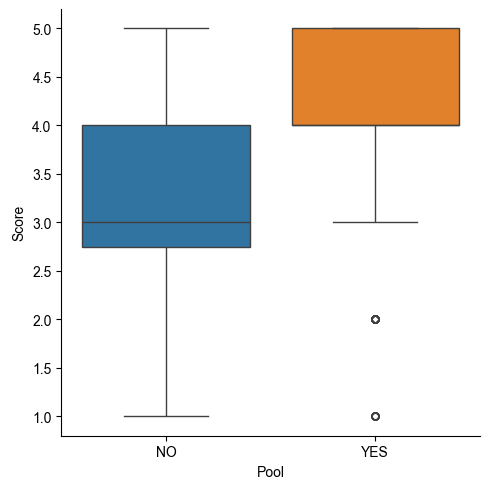

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(
    x="Pool",
    y="Score",
    data=df_trip_adv,
    kind="box",
    hue="Pool"
)

# Setting font size and plot background
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

plt.show()

## Seaborn categorical box plots (cont.)

Can use `hue` to split the data by a second category

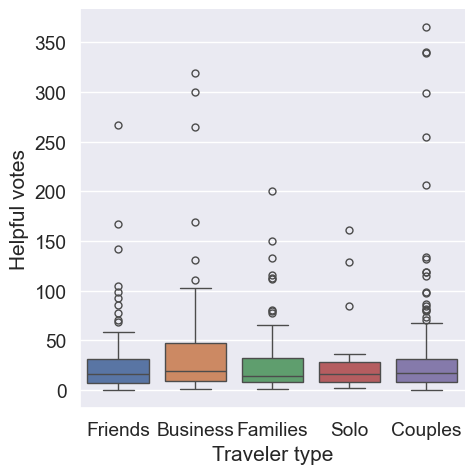

In [44]:
# Set the font size to 1.25
sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style("darkgrid")

# Create a boxplot
sns.catplot(x="Traveler type",
            y="Helpful votes",
            data=df_trip_adv,
            kind="box",
            hue="Traveler type"
)

plt.show()

<Axes: xlabel='Traveler type'>

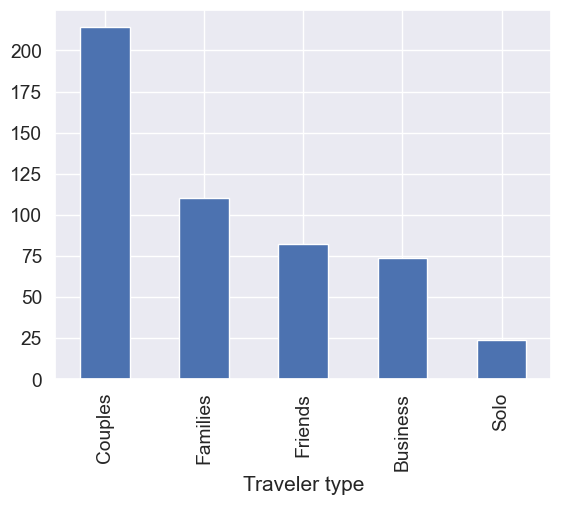

In [45]:
# traditional bar charts
df_trip_adv["Traveler type"].value_counts().plot.bar()

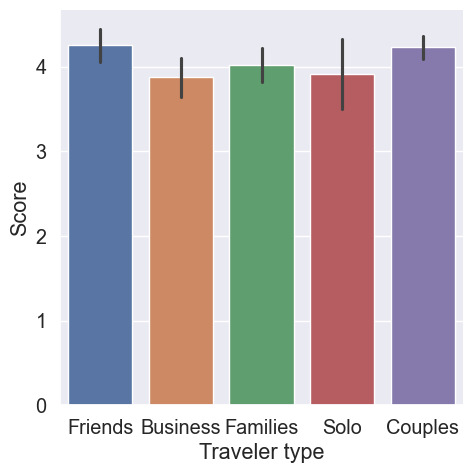

In [46]:
# heights are point est's and small bars represent the 95% CI
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(x="Traveler type", y="Score", data=df_trip_adv, kind="bar", hue="Traveler type") 

In [47]:
df_trip_adv["Traveler type"] = df_trip_adv["Traveler type"].astype("category") 
df_trip_adv["Traveler type"].cat.categories  # categories ordered alphabetically

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

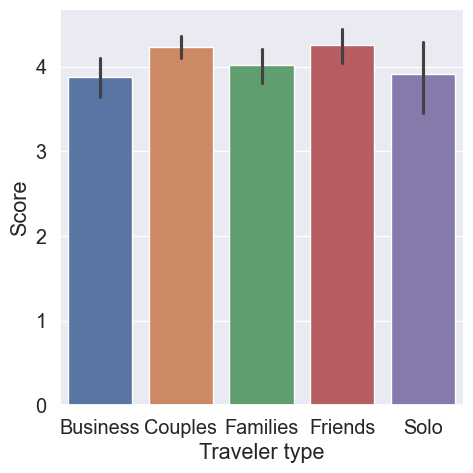

In [48]:
# plot now reflects categorical order
sns.catplot(x="Traveler type", y="Score", data=df_trip_adv, kind="bar", hue="Traveler type") 

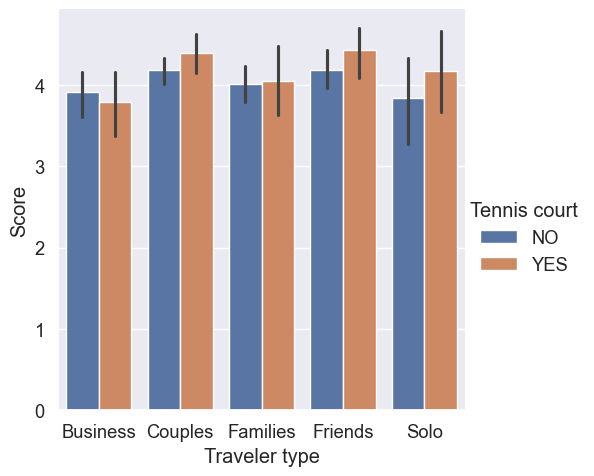

In [49]:
sns.set(font_scale=1.2) 
sns.set_style("darkgrid") 
sns.catplot(x="Traveler type", y="Score", data=df_trip_adv, kind="bar", 
            hue="Tennis court")  # <--- new parameter 

Period of stay
Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: count, dtype: int64


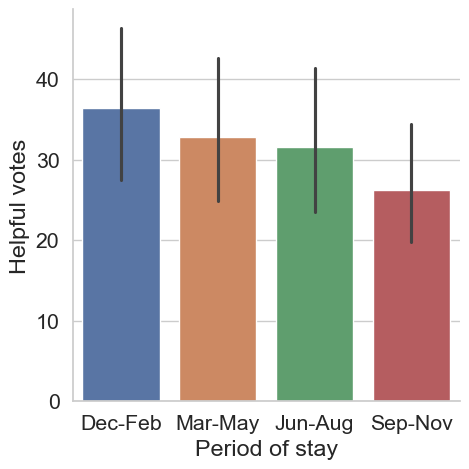

In [50]:
# Print the frequency counts of "Period of stay"
print(df_trip_adv["Period of stay"].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(x="Period of stay", y="Helpful votes", data=df_trip_adv, hue="Period of stay", kind="bar")  # as discussed earlier, need to set hue here
plt.show()

User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64


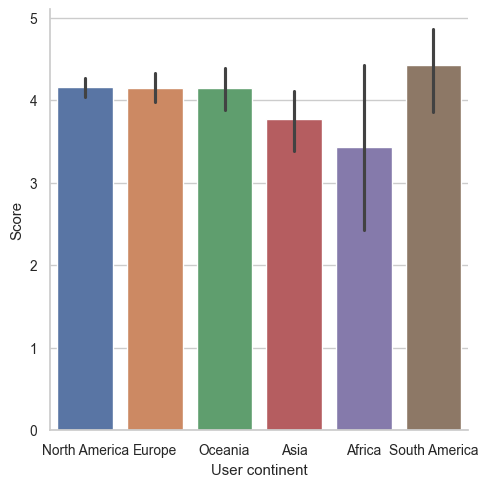

In [51]:
# Set style
sns.set(font_scale=.9)
sns.set_style("whitegrid")

# Print the frequency counts for "User continent"
print(df_trip_adv["User continent"].value_counts())

# Convert "User continent" to a categorical variable
df_trip_adv["User continent"] = df_trip_adv["User continent"].astype("category")

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(df_trip_adv["User continent"].value_counts().index)
df_trip_adv["User continent"] = df_trip_adv["User continent"].cat.reorder_categories(new_categories = continent_categories, ordered=True)
sns.catplot(x="User continent", y="Score", data=df_trip_adv, hue="User continent", kind="bar")
plt.show()



User continent
North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: count, dtype: int64


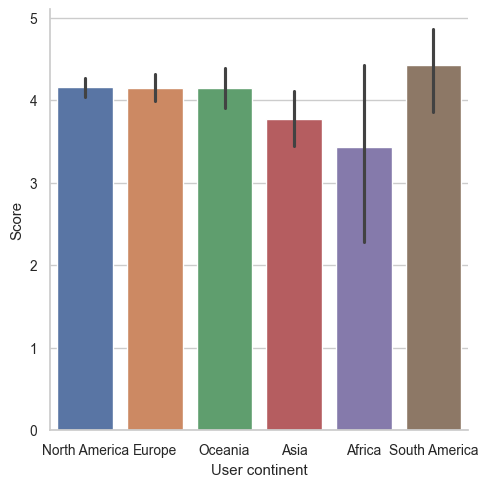

In [52]:
# Set style
sns.set(font_scale=.9)
sns.set_style("whitegrid")

# Print the frequency counts for "User continent"
print(df_trip_adv["User continent"].value_counts())

# Convert "User continent" to a categorical variable
df_trip_adv["User continent"] = df_trip_adv["User continent"].astype("category")

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(df_trip_adv["User continent"].value_counts().index)
df_trip_adv["User continent"] = df_trip_adv["User continent"].cat.reorder_categories(new_categories = continent_categories)
sns.catplot(x="User continent", y="Score", data=df_trip_adv, hue="User continent", kind="bar")
plt.show()

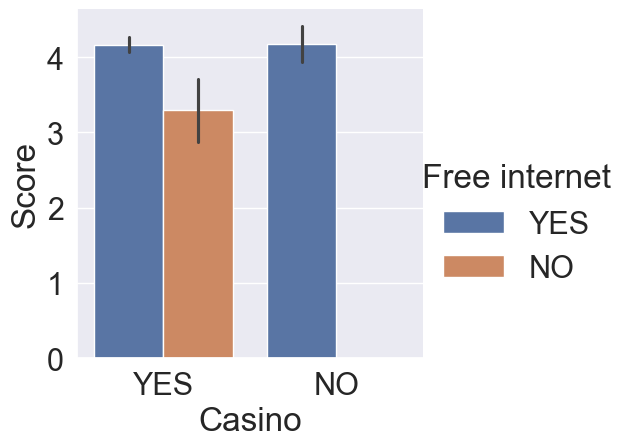

In [53]:
# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Casino", y="Score", data=df_trip_adv, kind="bar", hue="Free internet")
plt.show()

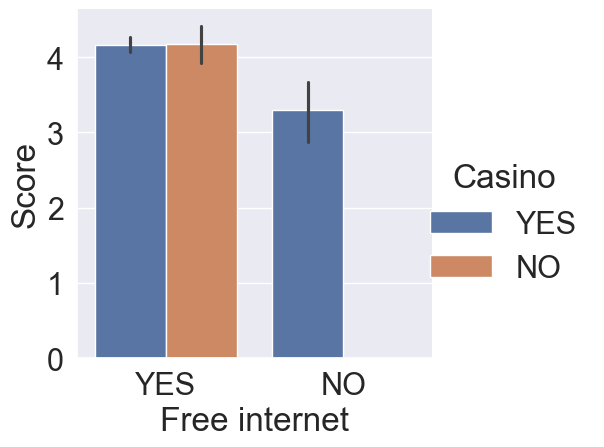

In [54]:
# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Free internet", y="Score", data=df_trip_adv, kind="bar", hue="Casino")
plt.show()

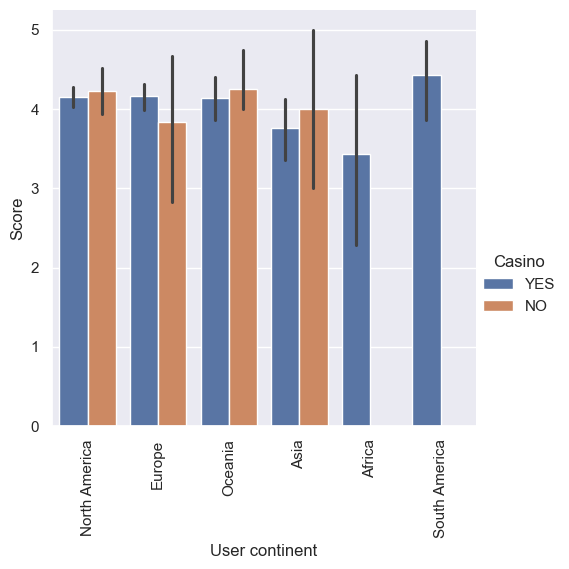

In [55]:
# Update x to be "User continent"
sns.set(font_scale=1.0)
sns.set_style("darkgrid")
ax = sns.catplot(x="User continent", y="Score", data=df_trip_adv, kind="bar", hue="Casino")
# simplier than ax.set_xticklabels(ax.get_xticklabels(), rotation=...)
ax.set_xticklabels(rotation=90)

plt.show()

## Point and count plots

+ `kind = "point"`
+ points are means
+ bars are CI (typically 95%)
+ `dodge` parameter offsets points so they don't overlap
+ `join` parameter specifies if lines should connect points (`True` by default)

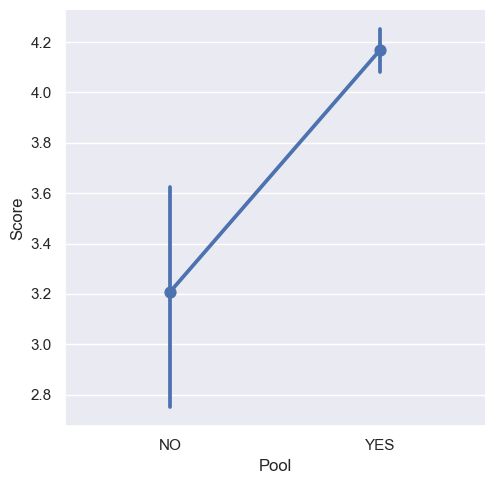

In [56]:
 sns.catplot(x="Pool", y="Score", data=df_trip_adv, kind="point") # points are means, bars are CI, note y-axis scale starts > 0

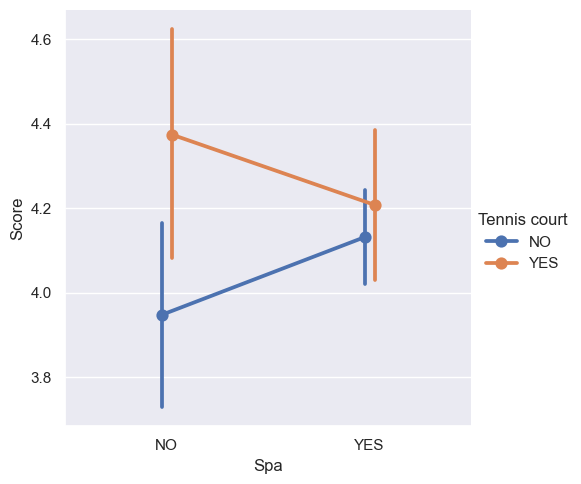

In [57]:
# using dodge parameter to offest point & CI bars
sns.catplot(x="Spa", y="Score", data=df_trip_adv, kind="point",
             hue="Tennis court", dodge=True)

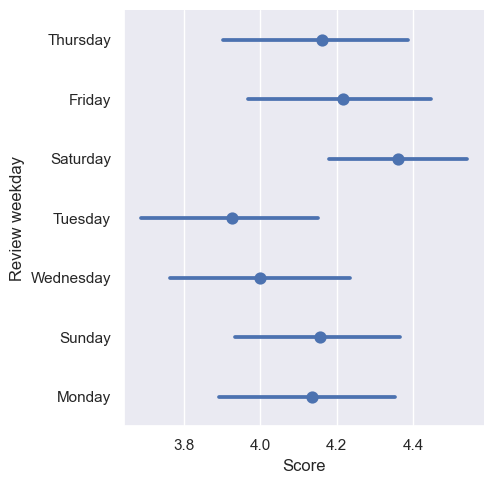

In [58]:
sns.catplot(x="Score", 
            y="Review weekday", 
            data=df_trip_adv, 
            kind="point",
            linestyle='none'  # preferred way - don't connect the points with a line
            # join=False        # deprecated way 
) 

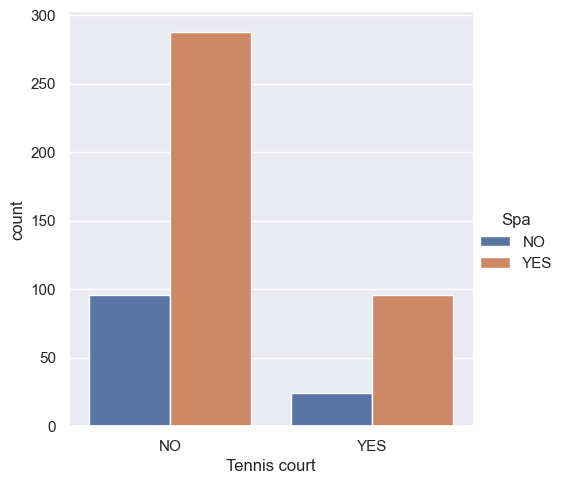

In [59]:
# similar to bar, but more oriented to categorical analysis
sns.catplot(x="Tennis court", data=df_trip_adv, kind="count", hue="Spa")

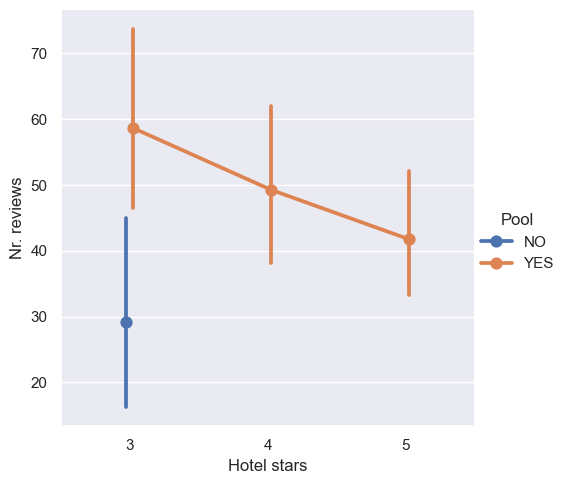

In [60]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x="Hotel stars",
  y="Nr. reviews",
  data=df_trip_adv,
  # Specify a point plot
  kind="point",
  hue="Pool",
  # Make sure the lines and points don't overlap
  dodge=True
)
plt.show()

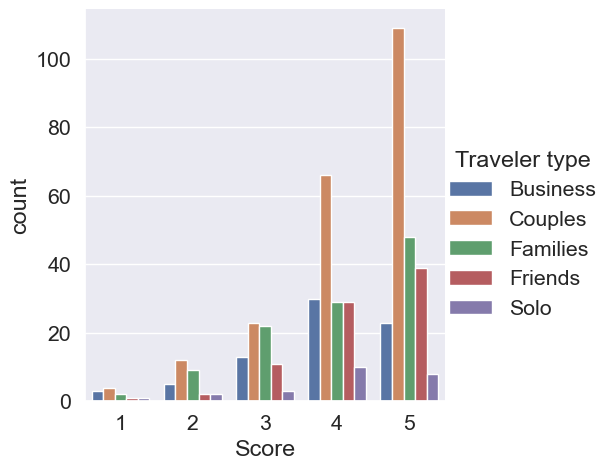

In [61]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  x="Score",
  data=df_trip_adv,
  kind="count",
  hue="Traveler type"
)
plt.show()

## Facet grids

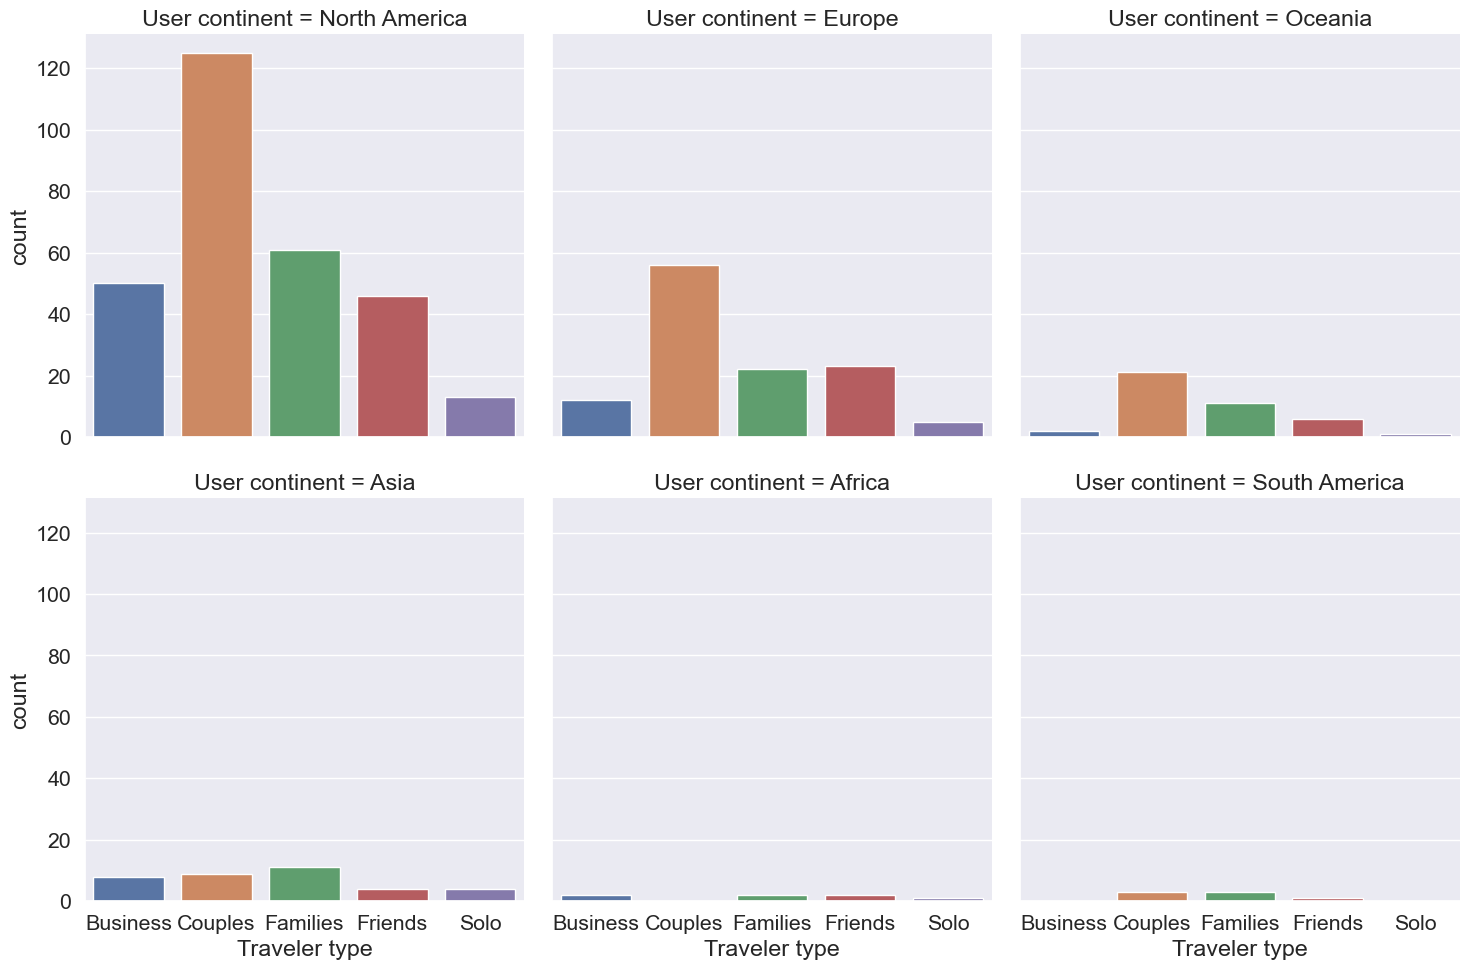

In [62]:
# save plot object so we revise things like titles and axis labels later
ax = sns.catplot(x="Traveler type", kind="count", 
                 col="User continent",  # create a catplot for each continent
                 hue="Traveler type",   # to address FutureWarning
                 col_wrap=3,            # wrap every 3 continents
                 # palette=sns.color_palette("Set1"),  # UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
                 data=df_trip_adv)
plt.show()

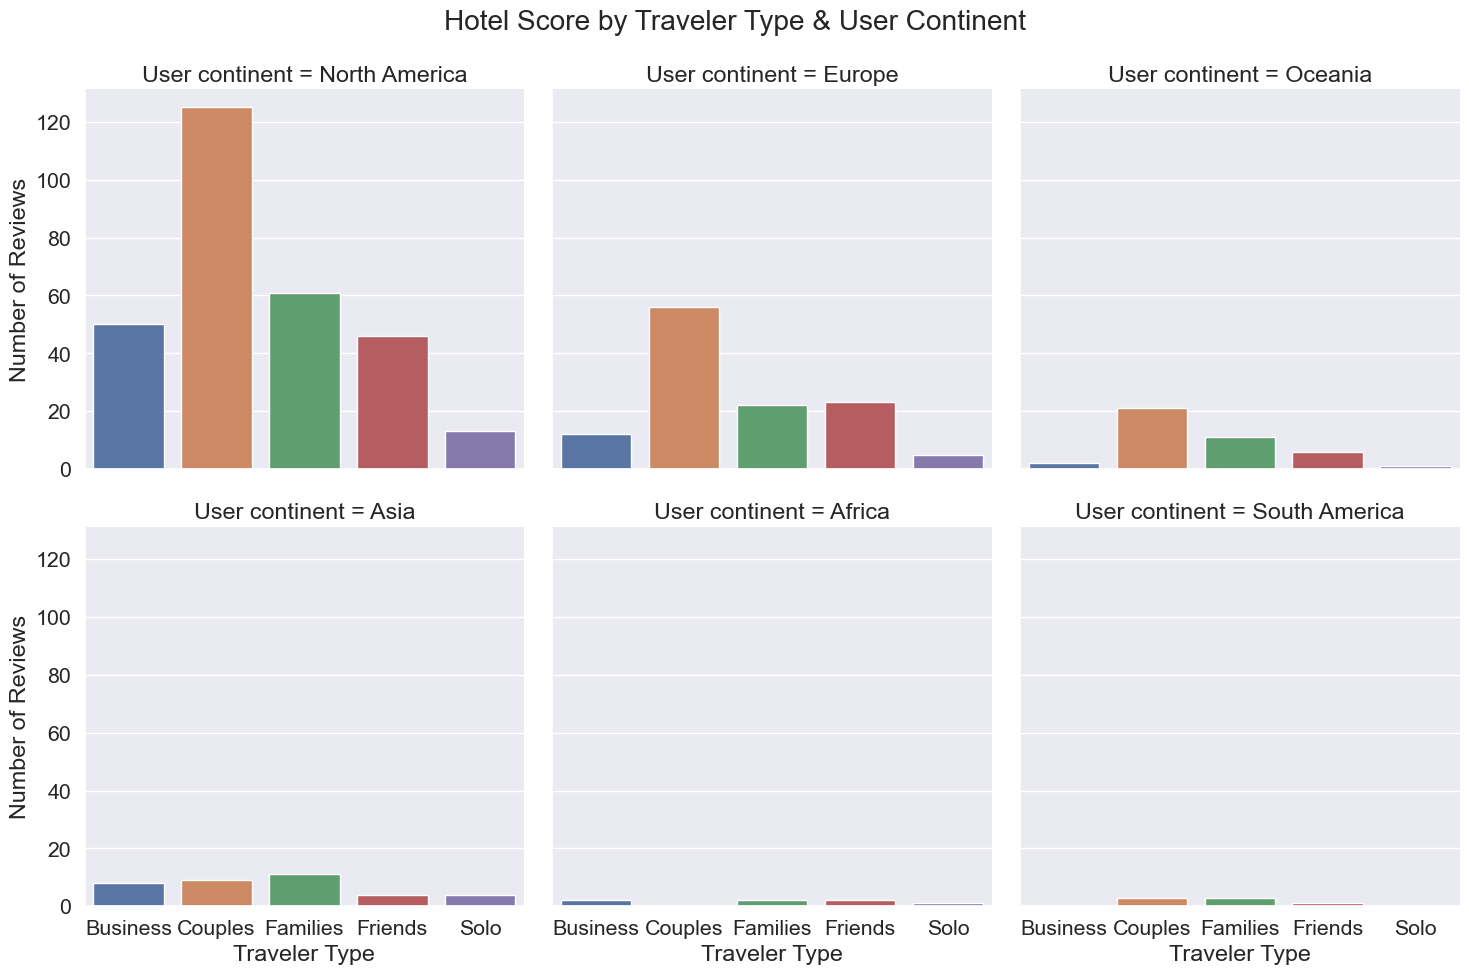

In [63]:
ax = sns.catplot(x="Traveler type", kind="count", 
                 col="User continent",  # create a catplot for each continent
                 hue="Traveler type",   # to address FutureWarning
                 col_wrap=3,            # wrap every 3 continents
                 # palette=sns.color_palette("Set1"),  # UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
                 data=df_trip_adv)

ax.fig.suptitle("Hotel Score by Traveler Type & User Continent") 
ax.set_axis_labels("Traveler Type", "Number of Reviews") 
plt.subplots_adjust(top=.9)  # make room for the title
plt.show() 

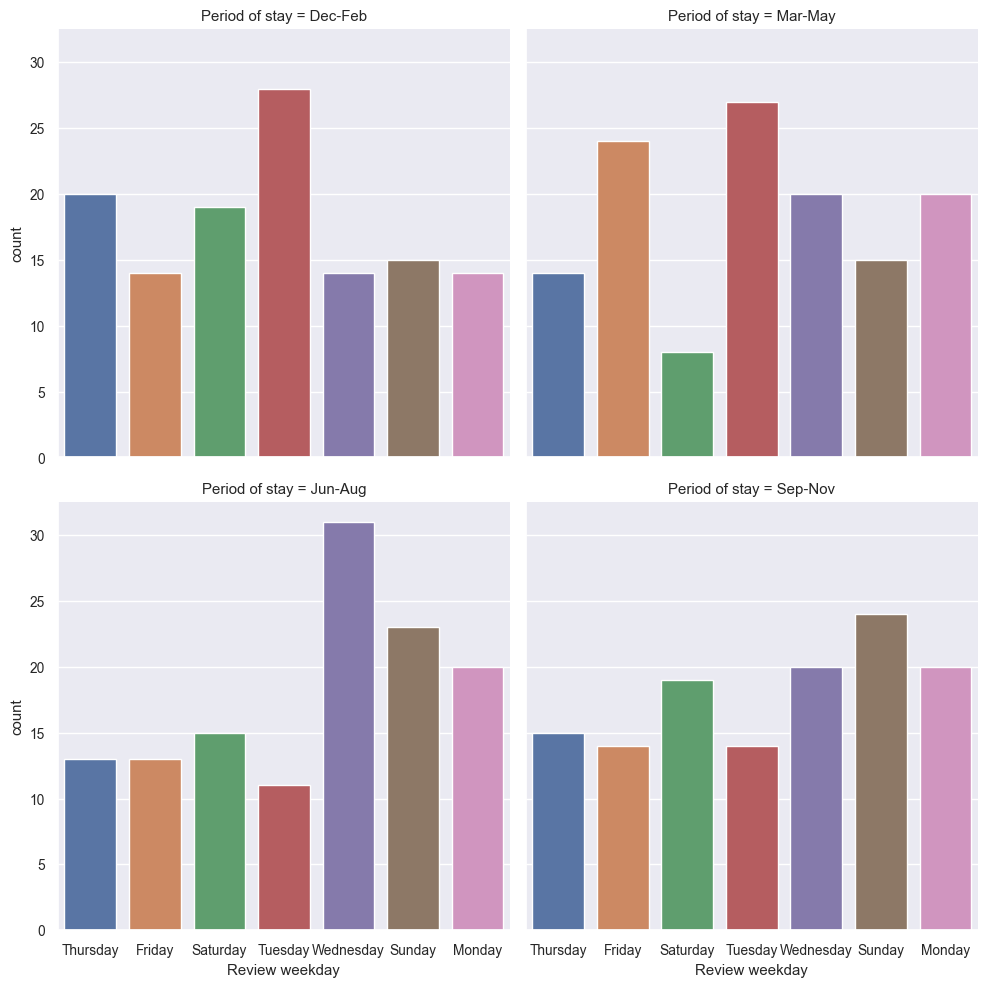

In [64]:
sns.set(font_scale=0.9)  # reduce font to avoid overlap

# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  x="Review weekday",
  # Specify Period of stay as the column to create individual graphics for
  col="Period of stay",
  hue="Review weekday",
  # Specify that a count plot should be created
  kind="count",
  # Wrap the plots after every 2nd graphic.
  col_wrap=2,
  data=df_trip_adv
)
plt.show()

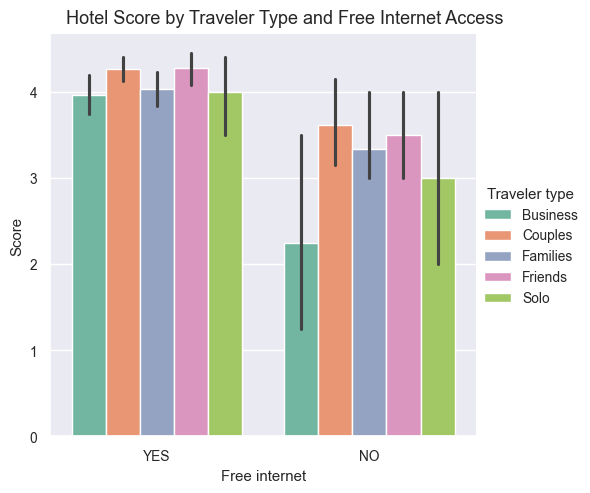

In [65]:
# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=df_trip_adv,
  palette=sns.color_palette("Set2")[:5]  # only use first 5 colors in palette (not mentioned in class)
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels(x="Free Internet", y="Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=0.93)
plt.show()

## Categorical pitfalls and challenges

+ Using a categorical series usually saves memory (but not always, so check)
+ Using the `.str` accessor object to manipulate data converts the Series to an object.
+ The `.apply()` method outputs a new Series as an object.
+ The common methods of adding, removing, replacing, or setting categories do not all handle missing categories the same way.
+ NumPy functions generally do not work with categorical Series.

In [66]:
df_used_cars = pd.read_csv("./data/cars.csv")
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [67]:
# do we save memory when we case manufacturer_name as category?
print("As object:  ", df_used_cars['manufacturer_name'].nbytes) 
print("As category: ", df_used_cars['manufacturer_name'].astype('category').nbytes)  # in this case... YES, we have about ~90% reduction!

As object:   308248
As category:  38971


In [68]:
# do we save memory when we case odometer_value as category?
print(df_used_cars['odometer_value'].describe().round(2), "\n")
print("As object:   ", df_used_cars['odometer_value'].nbytes)
print("As category: ", df_used_cars['odometer_value'].astype('category').nbytes)  # not as big, but still about ~60% reduction

count      38531.00
mean      248864.64
std       136072.38
min            0.00
25%       158000.00
50%       250000.00
75%       325000.00
max      1000000.00
Name: odometer_value, dtype: float64 

As object:    308248
As category:  125566


In [69]:
# check and convert - start with check
df_used_cars["color"] = df_used_cars["color"].astype("category") 
df_used_cars["color"] = df_used_cars["color"].str.upper() 
print(df_used_cars["color"].dtype)

object


In [70]:
# ... then convert back
df_used_cars["color"] = df_used_cars["color"].astype("category") 
print(df_used_cars["color"].dtype)

category


In [71]:
# reread data to reset back to original df (e.g. color is back to object/string)
df_used_cars = pd.read_csv("./data/cars.csv")
df_used_cars["color"].value_counts(dropna=False)

color
black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: count, dtype: int64

In [72]:
# look for missing values
df_used_cars["color"] = df_used_cars["color"].astype("category") 
df_used_cars["color"] = df_used_cars["color"].cat.set_categories(new_categories=["black", "silver", "blue"]) # can't pass "inplace=True" anymore
df_used_cars["color"].value_counts(dropna=False) # NOTICE all the NaN's when we do this...

color
NaN       18172
black      7705
silver     6852
blue       5802
Name: count, dtype: int64

In [73]:
# when a categorical column is an integer, will need to convert explicitly if we want to operate on it as if an integer
df_used_cars['number_of_photos'] = df_used_cars['number_of_photos'].astype("category") 
# df_used_cars['number_of_photos'].sum() # TypeError: 'Categorical' with dtype category does not support reduction 'sum'
df_used_cars['number_of_photos'].astype(int).sum() 

371788

In [74]:
# .str converts the column to an array which can use numpy methods such as contains
df_used_cars["color"].str.contains("red") 

0        False
1        False
2          NaN
3        False
4        False
         ...  
38526    False
38527    False
38528    False
38529    False
38530    False
Name: color, Length: 38531, dtype: object

## Memory savings (revisited)

Which of the following 3 columns in the used cars data will save the most memory by converting it to a categorical variable?

+ `price_usd` - `float64`
+ `drivetrain` - `object`
+ `model_name` - `object`

Before writing any code, we would suspect that `price_used` would save the **least** amount of memory because we expect there to be a larger number of distinct values. This leaves the last two which are strings. Of these two, we would expect the variable with the small number of levels (i.e. distinct values) would save the largest amount of memory. Let's check if this intuition is correct.

In [75]:
price_used_ratio = df_used_cars['price_usd'].astype("category").nbytes / df_used_cars['price_usd'].nbytes
drivetrain_ratio = df_used_cars['drivetrain'].astype("category").nbytes / df_used_cars['drivetrain'].nbytes
model_name_ratio = df_used_cars['model_name'].astype("category").nbytes / df_used_cars['model_name'].nbytes
print(f"ratio of (cat size)/(original size) for price_used = {round(price_used_ratio, 4)}")
print(f"ratio of (cat size)/(original size) for drivetrain = {round(drivetrain_ratio, 4)}")
print(f"ratio of (cat size)/(original size) for model_name = {round(model_name_ratio, 4)}")

ratio of (cat size)/(original size) for price_used = 0.3195
ratio of (cat size)/(original size) for drivetrain = 0.1251
ratio of (cat size)/(original size) for model_name = 0.279


In [76]:
# price_used saved the least amount of memory as expected, but what about the other 2 variables?
print(df_used_cars['drivetrain'].value_counts(), "\n")  # only 3 of these, so we expect this will save the most
print(df_used_cars['model_name'].value_counts())        # 1118 model names, so this should save LESS memory

drivetrain
front    27746
rear      5398
all       5387
Name: count, dtype: int64 

model_name
Passat    1423
Astra      751
Golf       707
A6         687
Mondeo     637
          ... 
C1500        1
Alero        1
Impala       1
360          1
Aspen        1
Name: count, Length: 1118, dtype: int64


### Looks like our intuition was spot on!

We save the most memory making `drivetrain` a categorical variable and we save the least memory by making `price_usd` as expected. So overall, the actual amount of memory savings:

`price_usd` < `model_name` < `drivetrain`

## String issues



In [77]:
# Print the frequency table of body_type and include NaN values
print(df_used_cars["body_type"].value_counts(dropna=False), "\n")

# Update NaN values
df_used_cars.loc[df_used_cars["body_type"].isna(), "body_type"] = "other"

# Convert body_type to title case
df_used_cars["body_type"] = df_used_cars["body_type"].str.title()

# Check the dtype
print(df_used_cars["body_type"].dtype)

body_type
sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: count, dtype: int64 

object


## Label encoding

+ Label encoding codes each category as an integer from 0 through `n` - 1, where `n` is the number of categories
+ A `-1` code is reserved for any missing values
+ Can save on memory
+ Often used in surveys
+ The drawback: not the best encoding method for machine learning
+ Usually want to create a map from the new codes to the old values
+ 

In [78]:
# 1st convert to categorical, then used code attribute of cat object
df_used_cars['manufacturer_name'] = df_used_cars['manufacturer_name'].astype("category")
df_used_cars['manufacturer_code'] = df_used_cars['manufacturer_name'].cat.codes  # create new col that is int encoded
# check the output
# print(df_used_cars.loc[[0,1,2,38528,38529,38530], ['manufacturer_name', 'manufacturer_code']])
# Subaru is the first manufacturer in the data set, but is the 46th name in alphabetical order
print(df_used_cars[['manufacturer_name', 'manufacturer_code']].head(3))
print(df_used_cars[['manufacturer_name', 'manufacturer_code']].tail(3))

  manufacturer_name  manufacturer_code
0            Subaru                 45
1            Subaru                 45
2            Subaru                 45
      manufacturer_name  manufacturer_code
38528          Chrysler                  8
38529          Chrysler                  8
38530          Chrysler                  8


In [79]:
# creating a code book
codes = df_used_cars['manufacturer_name'].cat.codes 
categories = df_used_cars['manufacturer_name']
name_map = dict(zip(codes, categories))  # codes are keys, values are categories
print(name_map)

{45: 'Subaru', 24: 'LADA', 12: 'Dodge', 54: 'УАЗ', 23: 'Kia', 35: 'Opel', 53: 'Москвич', 1: 'Alfa Romeo', 0: 'Acura', 10: 'Dacia', 27: 'Lexus', 33: 'Mitsubishi', 25: 'Lancia', 9: 'Citroen', 32: 'Mini', 21: 'Jaguar', 38: 'Porsche', 44: 'SsangYong', 11: 'Daewoo', 15: 'Geely', 50: 'ВАЗ', 13: 'Fiat', 14: 'Ford', 39: 'Renault', 42: 'Seat', 40: 'Rover', 48: 'Volkswagen', 28: 'Lifan', 22: 'Jeep', 5: 'Cadillac', 2: 'Audi', 52: 'ЗАЗ', 47: 'Toyota', 51: 'ГАЗ', 49: 'Volvo', 7: 'Chevrolet', 16: 'Great Wall', 4: 'Buick', 37: 'Pontiac', 29: 'Lincoln', 18: 'Hyundai', 34: 'Nissan', 46: 'Suzuki', 3: 'BMW', 30: 'Mazda', 26: 'Land Rover', 20: 'Iveco', 43: 'Skoda', 41: 'Saab', 19: 'Infiniti', 6: 'Chery', 17: 'Honda', 31: 'Mercedes-Benz', 36: 'Peugeot', 8: 'Chrysler'}


In [80]:
# we can use this map to convert codes back to their original values
df_used_cars['manufacturer_code'] = df_used_cars['manufacturer_name'].cat.codes  # recreate the codes
# revert to previous values
df_used_cars['manufacturer_code'].map(name_map)

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_code, Length: 38531, dtype: object

In [81]:
# boolean encoding (one-hot encoding)
df_used_cars["van_code"] = np.where(df_used_cars["body_type"].str.contains("van", regex=False), 1, 0) 
df_used_cars["van_code"].value_counts()

van_code
0    34923
1     3608
Name: count, dtype: int64

In [82]:
# Convert to categorical and print the frequency table
df_used_cars["color"] = df_used_cars["color"].astype("category")
print(df_used_cars["color"].value_counts())

# Create a label encoding
df_used_cars["color_code"] = df_used_cars["color"].cat.codes

# Create codes and categories objects
codes = df_used_cars["color"].cat.codes  # -1 used for NaN values, documentation not very helpful...
categories = df_used_cars["color"]
color_map = dict(zip(codes, categories))

# Print the map
print(color_map)

color
black     7705
silver    6852
blue      5802
Name: count, dtype: int64
{1: 'silver', 2: 'blue', -1: nan, 0: 'black'}


## One-Hot Encoding

It's important to use **orthogonal** vectors to encode categories so that ML algorithms don't learn a pattern that doesn't exist. For example, consider the following integer encoding:

0, 1, 2, 3

An ML algorithm would likely learn that there is some kind of ordinal positioning to these classes such as **class 0** being less than **class 3** when in fact, there is no "greater than" or "less than" with respect to categories.  They are just different (orthogonal).

In pandas, `get_dummies` is what we use to encode 1-Hot features. This function has the following 3 parameters:

+ `data` : a pandas DataFrame
+ `columns` : a list-like object of column names
+ `prefix` : a string to add to the beginning of each category

### A few important considerations

+ be mindful of potentially creating too many features which could lead to overfitting when building ML models
+ `NaN` values don't get their own column (which is generally a **good** thing)

In [83]:
df_used_cars[["odometer_value", "color"]].head() 

,odometer_value,color
0,190000,silver
1,290000,blue
2,402000,NaN
3,10000,blue
4,280000,black


In [84]:
# default dtype is boolean, so we need to pass dtype=int to get 1's and 0's
df_used_cars_onehot = pd.get_dummies(df_used_cars[["odometer_value", "color"]], dtype=int) # only the categorical column will get encoded
df_used_cars_onehot.head()  # notice how new column names are constructed by default (very reasonable!)

,odometer_value,color_black,color_silver,color_blue
0,190000,0,1,0
1,290000,0,0,1
2,402000,0,0,0
3,10000,0,0,1
4,280000,1,0,0


In [87]:
# reread data to reset back to original df (e.g. color is back to object/string)
df_used_cars = pd.read_csv("./data/cars.csv")

# running on the entire df, only the categorical col's get dummified
print(f"before creating dummies, shape of df: {df_used_cars.shape}")
df_used_cars_onehot = pd.get_dummies(df_used_cars, columns=["color"], prefix="", dtype=int) 
print(f"after creating dummies, shape of df: {df_used_cars_onehot.shape}")  # 11 new 1-hot encoded columns created from 'colors' column
df_used_cars_onehot.head()

before creating dummies, shape of df: (38531, 30)
after creating dummies, shape of df: (38531, 41)


,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,_brown,_green,_grey,_orange,_other,_red,_silver,_violet,_white,_yellow
0,Subaru,Outback,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,...,0,0,0,0,0,0,1,0,0,0
1,Subaru,Outback,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,...,0,0,0,0,0,0,0,0,0,0
2,Subaru,Forester,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,...,0,0,0,0,0,1,0,0,0,0
3,Subaru,Impreza,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,...,0,0,0,0,0,0,0,0,0,0
4,Subaru,Legacy,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,...,0,0,0,0,0,0,0,0,0,0
